# K-Means Clustering

K-means clustering is a popular unsupervised machine learning algorithm used for clustering data points into groups based on their similarity. The algorithm works by iteratively assigning data points to the nearest cluster centroid and then updating the centroids based on the new assignments. The process continues until the centroids converge and the cluster assignments remain constant.

In this notebook, we apply this algorithm on the penguin dataset and make analysis.

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Load the dataset
df = pd.read_csv("palmer_penguins.txt")

# Remove missing values
df = df.dropna()

# Select features for clustering
X = df[['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']]

# Standardize the data
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

In [10]:
print(df.info()) 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 333 entries, 0 to 343
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         333 non-null    int64  
 1   species            333 non-null    object 
 2   island             333 non-null    object 
 3   bill_length_mm     333 non-null    float64
 4   bill_depth_mm      333 non-null    float64
 5   flipper_length_mm  333 non-null    float64
 6   body_mass_g        333 non-null    float64
 7   sex                333 non-null    object 
 8   cluster            333 non-null    int32  
dtypes: float64(4), int32(1), int64(1), object(3)
memory usage: 24.7+ KB
None


In [11]:
print(df.describe())

       Unnamed: 0  bill_length_mm  bill_depth_mm  flipper_length_mm  \
count  333.000000      333.000000     333.000000         333.000000   
mean   172.303303       43.992793      17.164865         200.966967   
std     97.346548        5.468668       1.969235          14.015765   
min      0.000000       32.100000      13.100000         172.000000   
25%     89.000000       39.500000      15.600000         190.000000   
50%    172.000000       44.500000      17.300000         197.000000   
75%    256.000000       48.600000      18.700000         213.000000   
max    343.000000       59.600000      21.500000         231.000000   

       body_mass_g     cluster  
count   333.000000  333.000000  
mean   4207.057057    0.867868  
std     805.215802    0.791876  
min    2700.000000    0.000000  
25%    3550.000000    0.000000  
50%    4050.000000    1.000000  
75%    4775.000000    2.000000  
max    6300.000000    2.000000  


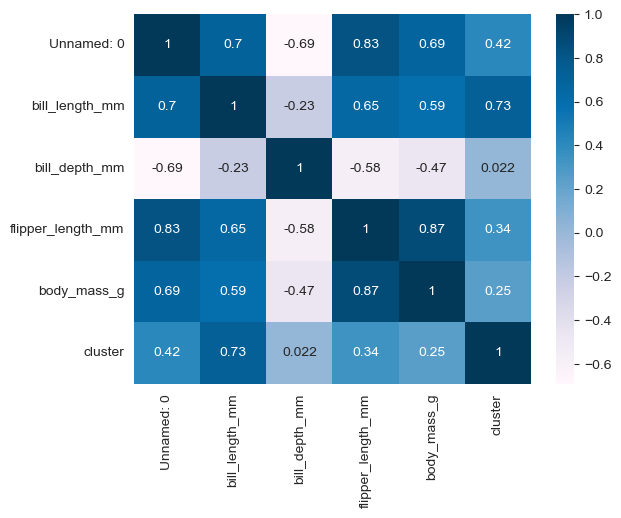

In [14]:
# Generate correlation matrix
corr_matrix = df.corr()
# Plot correlation heatmap
sns.set_style('white')
sns.heatmap(corr_matrix, annot=True, cmap='PuBu')
plt.show()

## Data Visualization

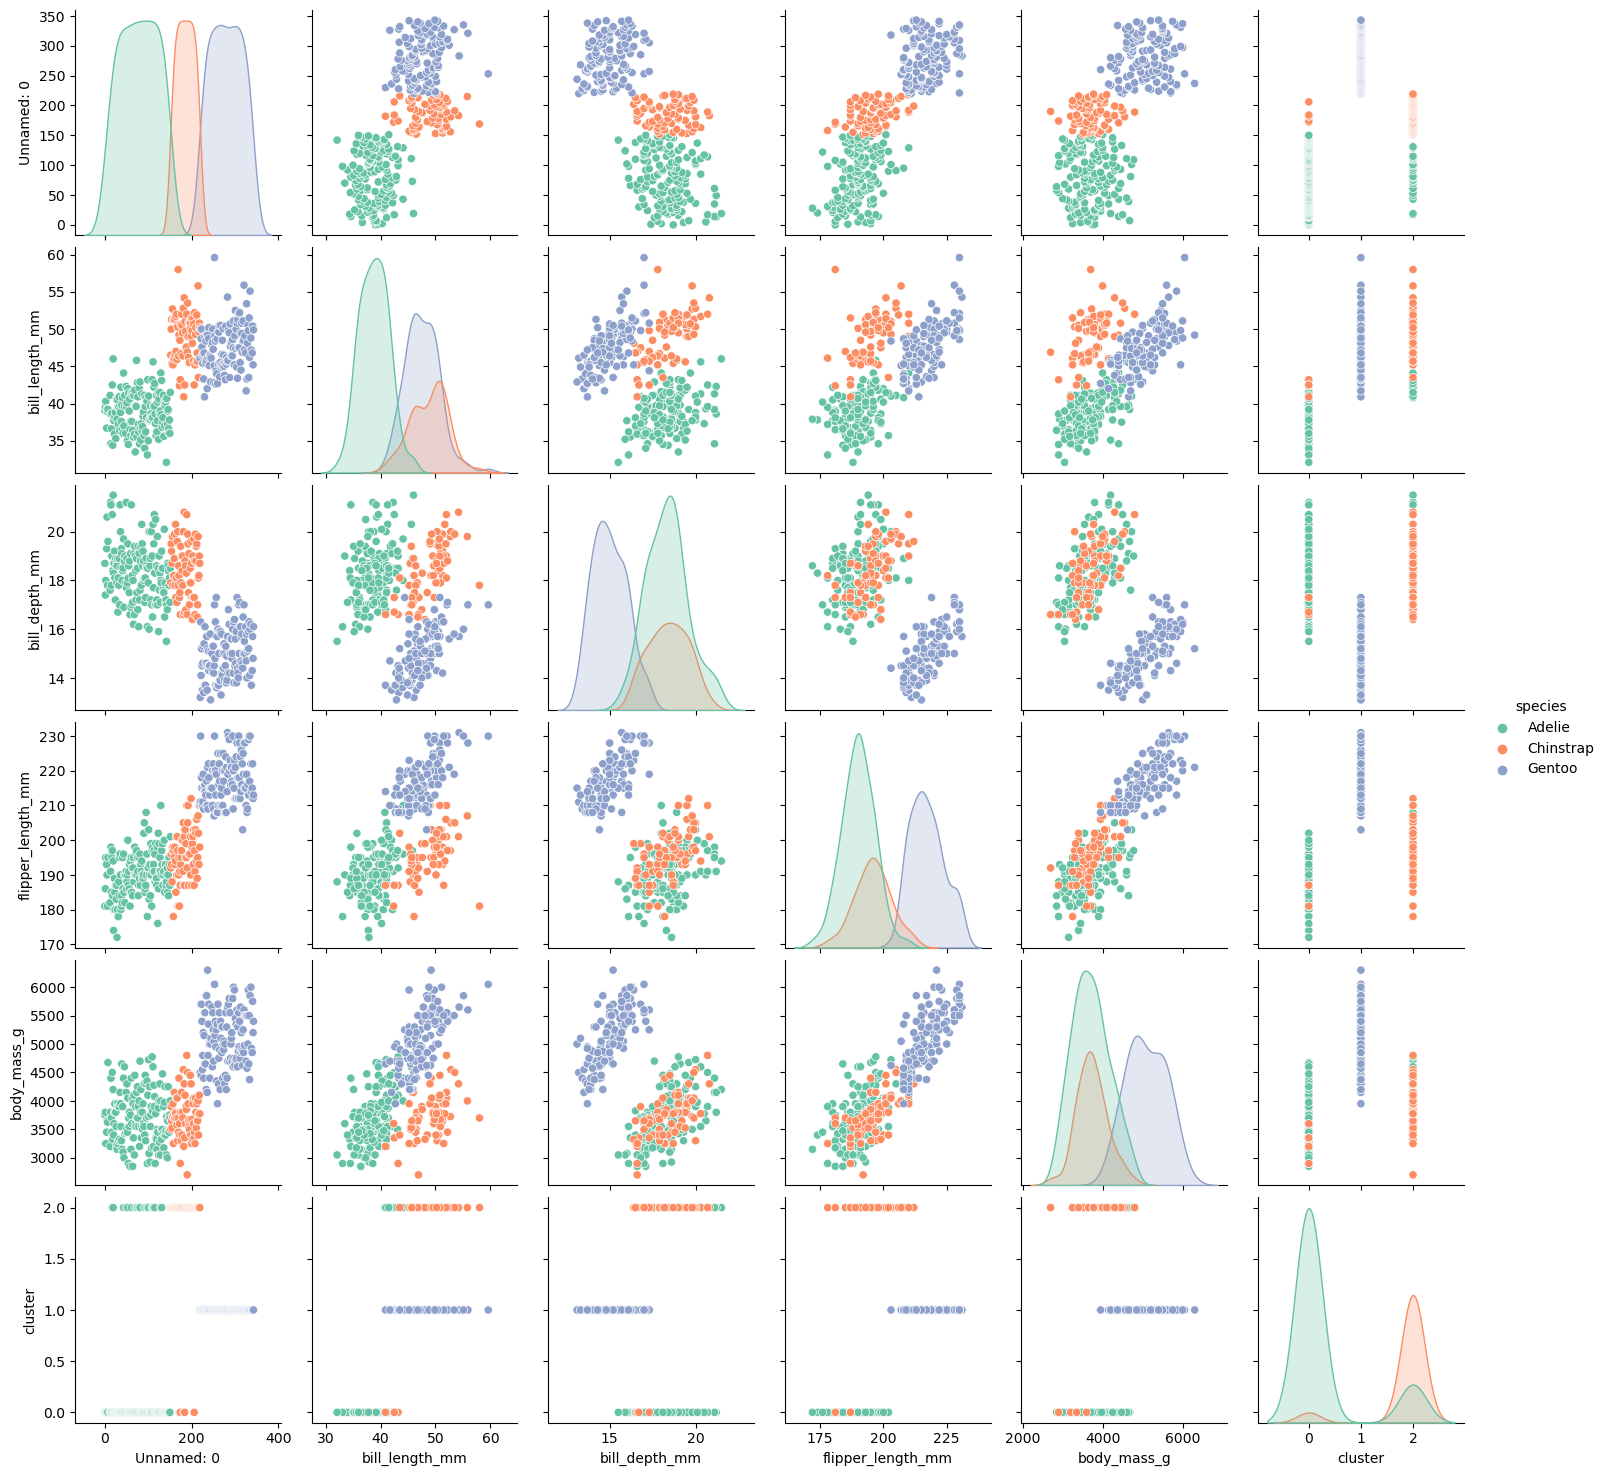

In [9]:
sns.pairplot(df, hue='species', palette='Set2')

## K-Means Clustering

### Model 1

In this part, we choose 'flipper_length_mm' and 'bill_depth_mm' to build our model. Since there exists overlap in the scatter plot, we could see the accuracy is not high.

Now that we have the data loaded and preprocessed, we can apply k-means clustering to it. Let's first determine the optimal number of clusters by using the elbow method.

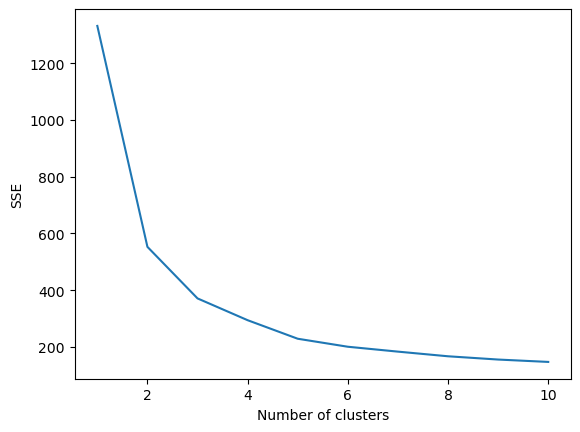

In [8]:
# Determine the optimal number of clusters
sse = {}
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_std)
    sse[k] = kmeans.inertia_

plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of clusters")
plt.ylabel("SSE")
plt.show()


Based on the elbow method, we can see that the optimal number of clusters is either 2 or 3. Let's choose 3 for this example and fit the data using k-means.

In [17]:
# Fit the data using k-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_std)

# Add cluster labels to the original dataframe
df['cluster'] = kmeans.labels_


In this code, we fit the standardized data using KMeans with 3 clusters, and then add the cluster labels to the original dataframe.

Finally, we can visualize the clusters using a scatter plot.

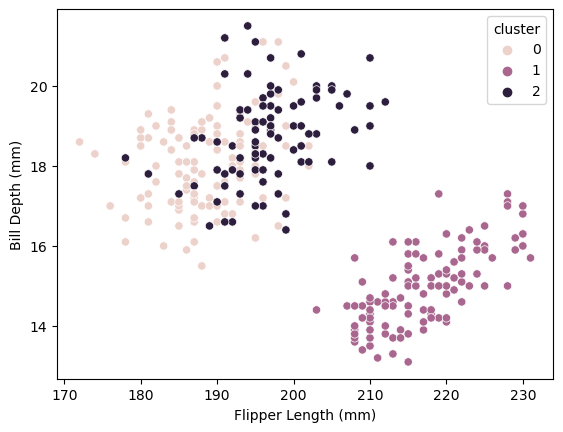

In [6]:
# Visualize the clusters
sns.scatterplot(data=df, x='flipper_length_mm', y='bill_depth_mm', hue='cluster')
plt.xlabel('Flipper Length (mm)')
plt.ylabel('Bill Depth (mm)')
plt.show()


These evaluation metrics suggest that the clustering algorithm performs reasonably well on this dataset. The silhouette score is moderate, indicating that the clusters are somewhat well-separated, while the adjusted Rand index is high, indicating good agreement between the true labels and the predicted labels. 

In [16]:
from sklearn.metrics import silhouette_score, adjusted_rand_score

# Compute the silhouette score
silhouette_avg = silhouette_score(X_std, kmeans.labels_)
print("Silhouette score:", silhouette_avg)

# Compute the adjusted Rand index
true_labels = df['species'].map({'Adelie': 0, 'Chinstrap': 1, 'Gentoo': 2}).values
ari = adjusted_rand_score(true_labels, kmeans.labels_)
print("Adjusted Rand index:", ari)


Silhouette score: 0.28207386722763916
Adjusted Rand index: 0.3195975958146524


### Model 2

In this part, we choose 'body_mass_g' and 'bill_length_mm' to build our model. We could see the model accuracy has significant improvement.

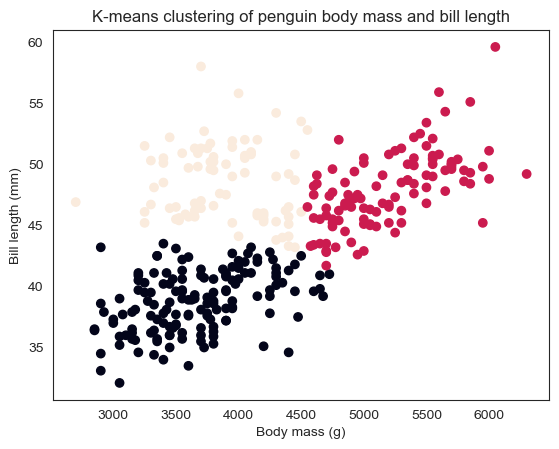

Silhouette score: 0.4710957847711216


In [20]:
# Select the "body_mass_g" and "bill_length_mm" features
X = df[['body_mass_g', 'bill_length_mm']]

# Standardize the data
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

# Apply k-means clustering with 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_std)

# Visualize the clusters
plt.scatter(X['body_mass_g'], X['bill_length_mm'], c=kmeans.labels_)
plt.xlabel('Body mass (g)')
plt.ylabel('Bill length (mm)')
plt.title('K-means clustering of penguin body mass and bill length')
plt.show()

# Compute the silhouette score
silhouette_avg = silhouette_score(X_std, kmeans.labels_)
print("Silhouette score:", silhouette_avg)

In [19]:
# Compute the adjusted Rand index
true_labels = df['species'].map({'Adelie': 0, 'Chinstrap': 1, 'Gentoo': 2}).values
ari = adjusted_rand_score(true_labels, kmeans.labels_)
print("Adjusted Rand index:", ari)

Adjusted Rand index: 0.7623223219542418


These evaluation metrics suggest that the clustering algorithm performs reasonably well on this subset of features. The silhouette score is moderate, indicating that the clusters are somewhat well-separated, while the adjusted Rand index is lower than the previous evaluation, indicating lower agreement between the true labels and the predicted labels. This suggests that the "body_mass_g" and "bill_length_mm" features alone may not be sufficient to accurately distinguish between the penguin species. However, we could explore other subsets of features or use other clustering algorithms to see if we can improve the performance.